Problem Statement- Bike-sharing system are meant to rent the bicycle and return to the different place for the bike sharing purpose in Washington DC. You are provided with rental data spanning for 2 years. You must predict the total count of bikes rented during each hour covered by the test set, using only information available prior to the rental period.

Importing Data set

In [1]:
import pandas as pd
df= pd.read_csv('train_bikes.csv')

In [2]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [3]:
#looking at information of data along with missing values information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [4]:
df.isna().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

NO MISSING VALUES :)

In [5]:
#Conversion of date
df['datetime'] = pd.to_datetime(df['datetime'])
df['date'] = df['datetime'].dt.date
df['time'] = df['datetime'].dt.time

In [6]:
df.drop('datetime',axis=1,inplace=True)
df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,time
0,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011-01-01,00:00:00
1,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011-01-01,01:00:00
2,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011-01-01,02:00:00
3,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011-01-01,03:00:00
4,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011-01-01,04:00:00


Univariate Analysis

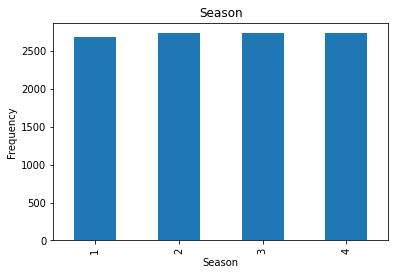

In [71]:
import matplotlib.pyplot as plt
df['season'].value_counts().sort_index().plot(kind="bar")
plt.title('Season')
plt.xlabel('Season')
plt.ylabel('Frequency')
plt.show()

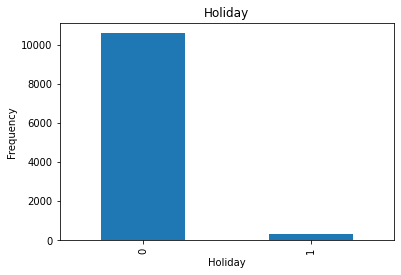

In [72]:
df['holiday'].value_counts().sort_index().plot(kind="bar")
plt.title('Holiday')
plt.xlabel('Holiday')
plt.ylabel('Frequency')
plt.show()

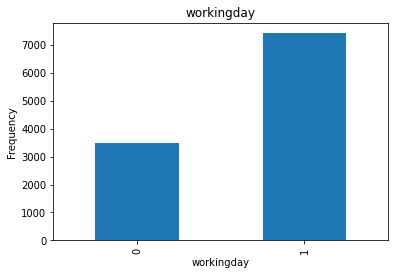

In [73]:
df['workingday'].value_counts().sort_index().plot(kind="bar")
plt.title('workingday')
plt.xlabel('workingday')
plt.ylabel('Frequency')
plt.show()

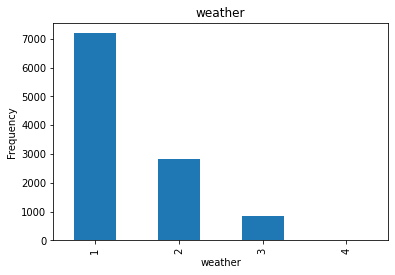

In [74]:
df['weather'].value_counts().sort_index().plot(kind="bar")
plt.title('weather')
plt.xlabel('weather')
plt.ylabel('Frequency')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


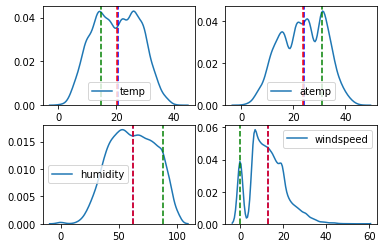

In [11]:
#distribution od valued data to check distribution of data
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
%matplotlib inline
import seaborn as sns
a=['temp','atemp','humidity','windspeed']
for i in range(len(a)):
    plt.subplot(int('22'+str(i))+1)
    sns.kdeplot(df[a[i]])
    plt.axvline(np.median(df[a[i]]),color='b', linestyle='--')
    plt.axvline(np.mean(df[a[i]]),color='r', linestyle='--')
    plt.axvline(stats.mode(df[a[i]])[0],color='g', linestyle='--')
plt.show()

We can observe that the data is not normally distributed so we have to consider transorm these data for Some ML model

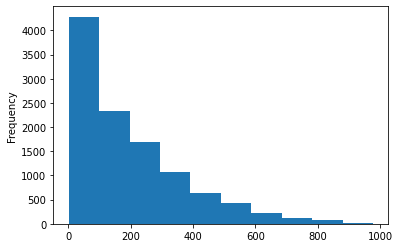

In [12]:
df['count'].plot(kind="hist")

In [14]:
# Splitting of date
df["day"] = df['date'].map(lambda x: x.day)
df["month"] = df['date'].map(lambda x: x.month)
df["year"] = df['date'].map(lambda x: x.year)

In [15]:
df.drop(['date','casual','registered'],inplace=True,axis=1)

In [78]:
df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,time,day,month,year
0,1,0,0,1,9.84,14.395,81,0.0,16,00:00:00,1,1,2011
1,1,0,0,1,9.02,13.635,80,0.0,40,01:00:00,1,1,2011
2,1,0,0,1,9.02,13.635,80,0.0,32,02:00:00,1,1,2011
3,1,0,0,1,9.84,14.395,75,0.0,13,03:00:00,1,1,2011
4,1,0,0,1,9.84,14.395,75,0.0,1,04:00:00,1,1,2011


Multivariate analysis

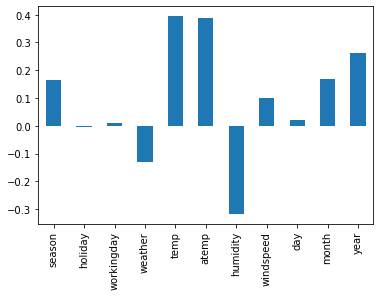

In [67]:
#checking of correlation with respect to count(target Variable)
df[['season','holiday','workingday','weather','temp','atemp','humidity','windspeed','day','month','year']].corrwith(df['count']).plot(kind='bar')

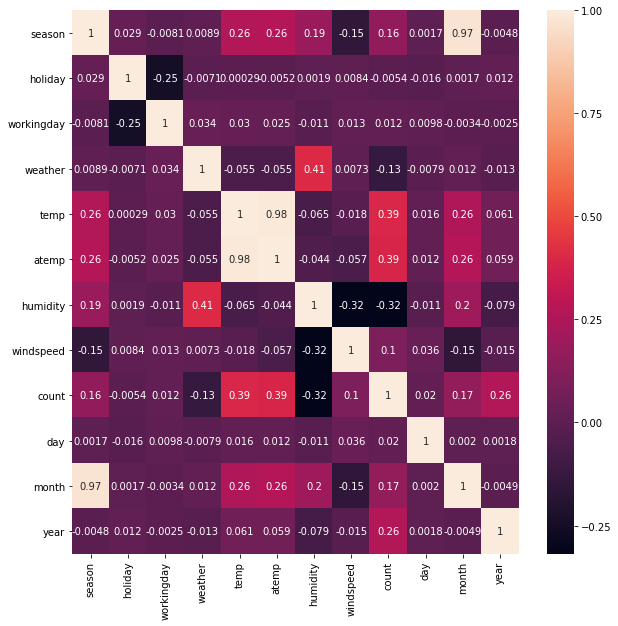

In [69]:
#Correlation matrix
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

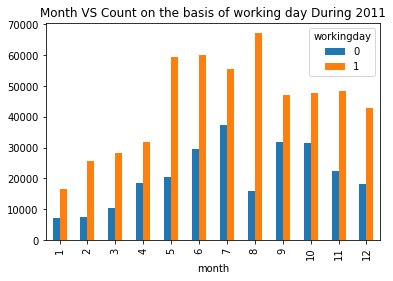

In [89]:
df[df["year"]==2011].groupby(['month', 'workingday'])['count'].agg(sum).unstack().plot(kind='bar')
plt.title('Month VS Count on the basis of working day During 2011')
plt.show()

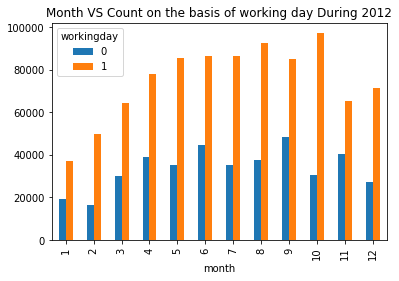

In [81]:
df[df["year"]==2012].groupby(['month', 'workingday'])['count'].agg(sum).unstack().plot(kind='bar')
plt.title('Month VS Count on the basis of working day During 2012')
plt.show()

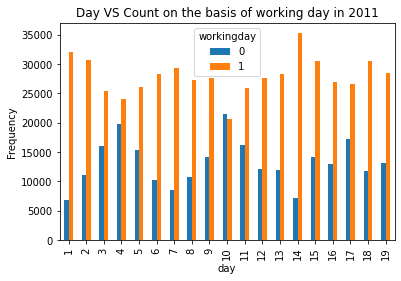

In [82]:
df[df["year"]==2011].groupby(['day', 'workingday'])['count'].agg(sum).unstack().plot(kind='bar')
plt.title('Day VS Count on the basis of working day in 2011')
plt.ylabel('Frequency')
plt.show()

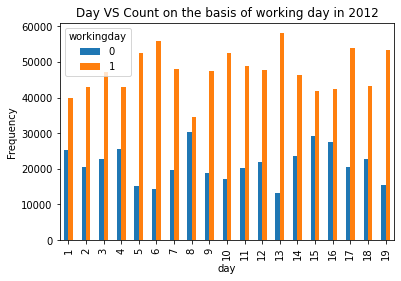

In [84]:
df[df["year"]==2012].groupby(['day', 'workingday'])['count'].agg(sum).unstack().plot(kind='bar')
plt.title('Day VS Count on the basis of working day in 2012')
plt.ylabel('Frequency')
plt.show()

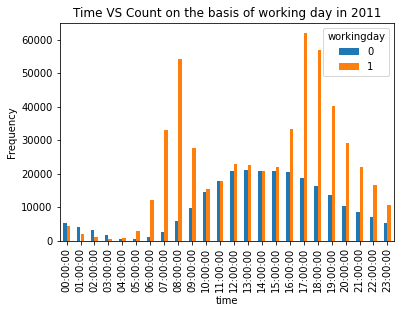

In [85]:
df[df["year"]==2011].groupby(['time', 'workingday'])['count'].agg(sum).unstack().plot(kind='bar')
plt.title('Time VS Count on the basis of working day in 2011')
plt.ylabel('Frequency')
plt.show()

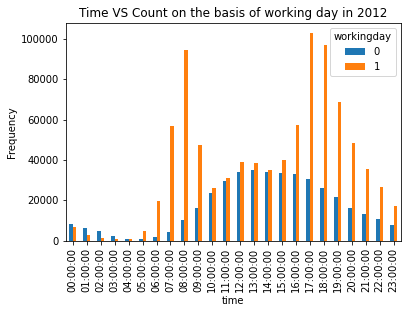

In [86]:
df[df["year"]==2012].groupby(['time', 'workingday'])['count'].agg(sum).unstack().plot(kind='bar')
plt.title('Time VS Count on the basis of working day in 2012')
plt.ylabel('Frequency')
plt.show()

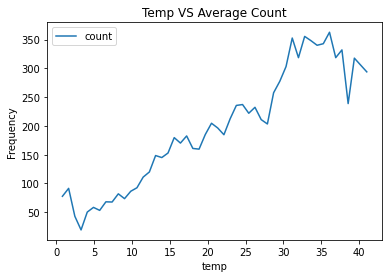

In [75]:
df.groupby('temp')[['count']].mean().plot()
plt.title('Temp VS Average Count')
plt.ylabel('Frequency')
plt.show()

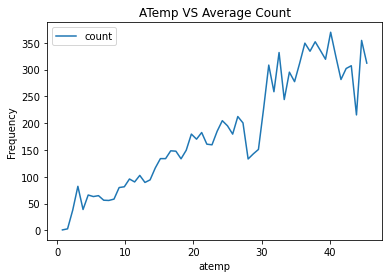

In [76]:
df.groupby('atemp')[['count']].mean().plot()
plt.title('ATemp VS Average Count')
plt.ylabel('Frequency')
plt.show()